Face detection is a type of computer vision technology that is able to identify people’s faces within digital images. This is very easy for humans, but computers need precise instructions. The images might contain many objects that aren’t human faces, like buildings, cars, animals, and so on.

Facial recognition involves identifying the face in the image as belonging to person X and not person Y. It is often used for biometric purposes, like unlocking your smartphone.

Facial analysis tries to understand something about people from their facial features, like determining their age, gender, or the emotion they are displaying.

Facial tracking is mostly present in video analysis and tries to follow a face and its features (eyes, nose, and lips) from frame to frame. The most popular applications are various filters available in mobile apps like Snapchat.

OCR

Object detection

All of these problems have different technological solutions.

About colours and computers:

- Display is made of many pixels
- Pixels are arranged in a grid and each pixel is a certain colour
- The more number of pixels make up the display better the clarity also known as Resolution(amount of pixels)
- Computers don't know colours they operate on binary values
- There are 3 colour channels (RGB)
- Each pixel is a combo of these three channels
- Each channel represented by 8 bits
- 8 bit stores 256 values(0-255)
- RGB also known as 24 bit colour(3 channels x 8 bit per channel)

- Grayscale has only one channel
- 000 for light(white), 255 for dark(black), 001-254(shades of gray)

OpenCV



!pip install opencv-python

In [2]:
import cv2
# To work better with OpenCV we will numpy also
import numpy as np
# Also we will need matplotlib which we will discuss later
from matplotlib import pyplot as plt

cv2.imread(), cv2.imshow() , cv2.imwrite()

cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel

Note: 
Instead of these three flags, you can simply pass integers 1, 0 or -1 respectively. Default is -1

In [17]:
# Read an image
img_original = cv2.imread('objects.jpg')
cv2.imshow("Image no flag", img_original)

# Read with different flags
img_original = cv2.imread('objects.jpg',-1)
img_gray = cv2.imread('objects.jpg',0)
img_color = cv2.imread('objects.jpg',1)
cv2.imshow('Image flag',img_gray)
# Wait for any(0) keystroke
cv2.waitKey(0)
# Close all the windows
cv2.destroyAllWindows()

# To close all windows only when esc key is pressed 
# k = cv2.waitKey(0)
# if k == 27:         # wait for ESC key to exit
#     cv2.destroyAllWindows()

BGR
RGB

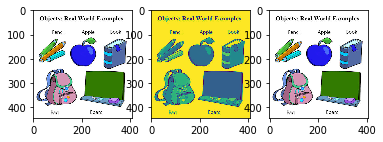

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(img_original)

ax2.imshow(img_gray)

ax3.imshow(img_color)

plt.show()

In [ ]:
cv2.imwrite('objects.jpg',img_gray)

cv2.VideoCapture(), cv2.VideoWriter()

cap.read() returns a bool (True/False). If frame is read correctly, it will be True. So you can check end of the video by checking this return value.

Sometimes, cap may not have initialized the capture. In that case, this code shows error. You can check whether it is initialized or not by the method cap.isOpened(). If it is True, OK. Otherwise open it using cap.open().

You can also access some of the features of this video using cap.get(propId) method where propId is a number from 0 to 18. Each number denotes a property of the video (if it is applicable to that video) and full details can be seen here: Property Identifier. Some of these values can be modified using cap.set(propId, value). Value is the new value you want.

For example, I can check the frame width and height by cap.get(3) and cap.get(4). It gives me 640x480 by default. But I want to modify it to 320x240. Just use ret = cap.set(3,320) and ret = cap.set(4,240).

In [6]:
video = cv2.VideoCapture(0) # 0 signifies the device video port 1, 2 ... defines different connected devices

while(True):
    # Capture the video(frames)
    ret, frame = video.read()

    # Operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
#     if cv2.waitKey(0):
#         break

# When everything done, release the capture
video.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        # Write the frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

It is same as capturing from Camera, just change camera index with video file name. Also while displaying the frame, use appropriate time for cv2.waitKey(). If it is too less, video will be very fast and if it is too high, video will be slow (Well, that is how you can display videos in slow motion). 25 milliseconds will be OK in normal cases.

In [3]:
cap = cv2.VideoCapture('disney.avi')

while(cap.isOpened()):
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2BGRA)
    
    # frame = cv2.flip(frame,0) To flip a video vertically 

    cv2.imshow('frame',gray)
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

cv2.line(), cv2.circle() , cv2.rectangle(), cv2.ellipse(), cv2.putText()

In [ ]:

# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

img = cv2.circle(img,(447,63), 63, (0,0,255), -1)

img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)